<a href="https://colab.research.google.com/github/greatsong/2021fastai_study/blob/main/fastai_chaper2(210912).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fastai2

In [ ]:
# 코랩일 경우 런타임 - 런타임 유형 변경 - GPU 설정 후 실행하세요!

In [ ]:
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
# 위 코드 실행 후 [메뉴] - [런타임] - [런타임 다시 시작] - [예]

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') 

In [ ]:
!pip install -Uqq fastbook

In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
# azure 가입(카드 번호 입력, free 플랜으로 선택, 리소스로 이동 등 신경쓸 것들이 조금 있음)
# 정확히 '키1, 키2'가 보이는 페이지에서 복붙해야함!
key = '키 생성'

In [ ]:
search_images_bing

<function fastbook.search_images_bing>

In [ ]:
result1 = search_images_bing(key, '천혜향')
result2 = search_images_bing(key, '한라봉')
result3 = search_images_bing(key, '귤')

In [ ]:
ims = result1.attrgot('contentUrl')
len(ims)

150

In [ ]:
ims[0]

'http://www.ttlnews.com/upload/editor_content_images/1548124937235_editor_image.jpg'

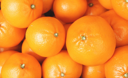

In [ ]:
dest1 = '/images/천혜향.jpg' # images 앞에 / 붙여야 함!
download_url(ims[0], dest1)

im = Image.open(dest1)
im.to_thumb(128,128)

In [ ]:
fruit_types = '천혜향', '한라봉', '귤'
path = Path('/fruit') # / 붙여야 함!

In [ ]:
if not path.exists() :
  path.mkdir() 
  for o in fruit_types : 
    print(path, o) # 확인용
    dest = (path/o)
    print(dest) # 확인용
    dest.mkdir(exist_ok = True)
    results = search_images_bing(key, o)
    download_images(dest, urls = results.attrgot('contentUrl'))

/fruit 천혜향
/fruit/천혜향
/fruit 한라봉
/fruit/한라봉
/fruit 귤
/fruit/귤


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
fns = get_image_files(path)

In [ ]:
fns

(#394) [Path('/fruit/천혜향/00000057.jpg'),Path('/fruit/천혜향/00000121.jpg'),Path('/fruit/천혜향/00000109.jpg'),Path('/fruit/천혜향/00000013.jpg'),Path('/fruit/천혜향/00000115.jpg'),Path('/fruit/천혜향/00000035.jpg'),Path('/fruit/천혜향/00000118.jpg'),Path('/fruit/천혜향/00000122.jpg'),Path('/fruit/천혜향/00000076.jpg'),Path('/fruit/천혜향/00000091.jpg')...]

In [ ]:
failed = verify_images(fns)

In [ ]:
failed

(#0) []

In [ ]:
failed.map(Path.unlink)

(#0) []

In [ ]:
# 데이터 로더스

In [ ]:
fruits = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
                   get_y = parent_label,
                   item_tfms = Resize(128))

In [ ]:
dls = fruits.dataloaders(path)

In [ ]:
len(dls.valid.items)

78

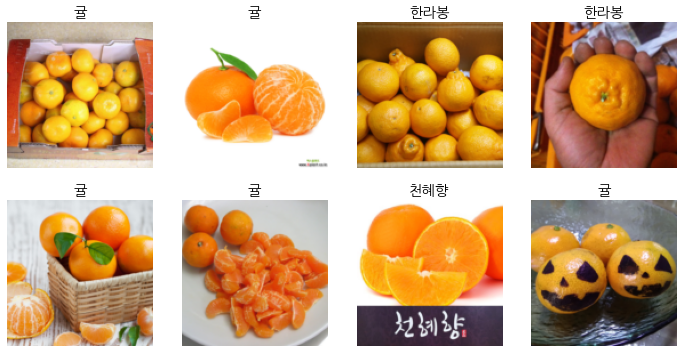

In [ ]:
dls.valid.show_batch(max_n = 8, nrows = 2)

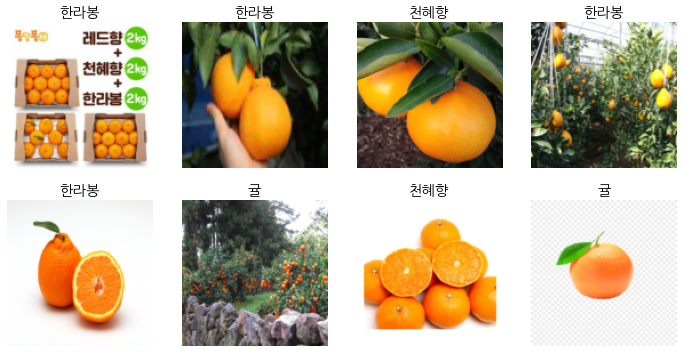

In [ ]:
f = fruits.new(item_tfms = Resize(128, ResizeMethod.Squish))
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n = 8, nrows = 2)

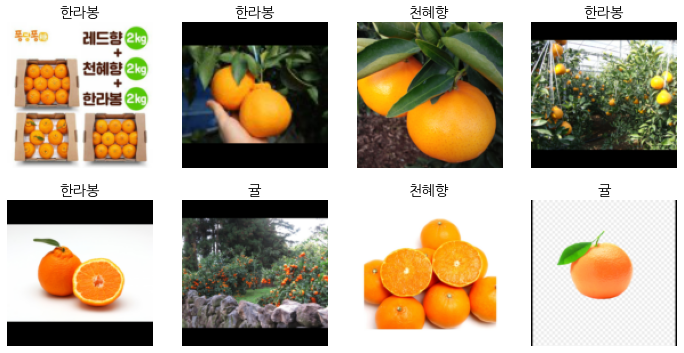

In [ ]:
f = fruits.new(item_tfms = Resize(128, ResizeMethod.Pad, pad_mode = 'zeros'))
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n = 8, nrows = 2)

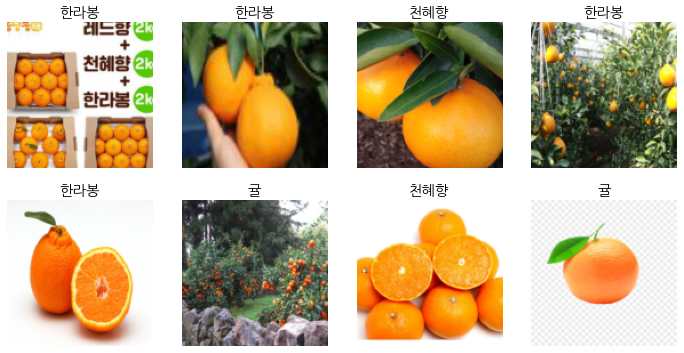

In [ ]:
f = fruits.new(item_tfms = RandomResizedCrop(128, min_scale = 0.3))
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n = 8, nrows = 2)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


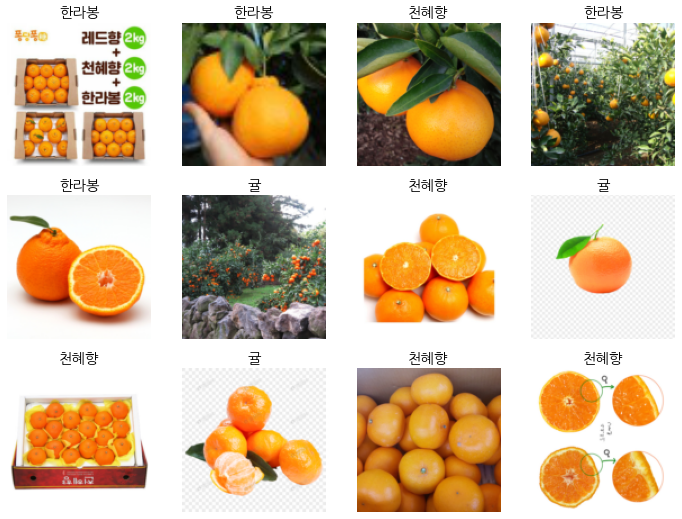

In [ ]:
f = fruits.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult = 4.9)) # 5 이상이면 작동 안됨
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n = 12, nrows = 3)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


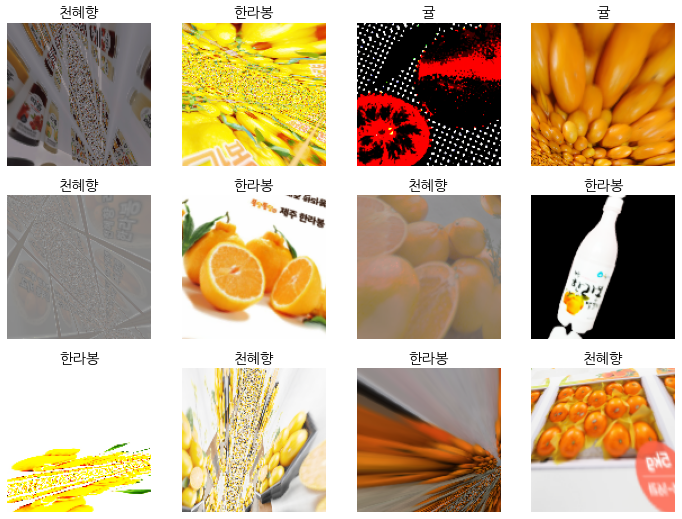

In [ ]:
f = fruits.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult = 4.9)) # 5 이상이면 작동 안됨
dls = fruits.dataloaders(path)
dls.train.show_batch(max_n = 12, nrows = 3)

In [ ]:
fruits = fruits.new(item_tfms = RandomResizedCrop(224, min_scale = 0.5), 
               batch_tfms = aug_transforms()) 
dls = fruits.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.786245,2.381526,0.692308,00:10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.503013,1.542489,0.564103,00:10
1,1.380696,1.220067,0.461538,00:10
2,1.237156,0.979859,0.397436,00:10
3,1.093890,0.867789,0.397436,00:10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


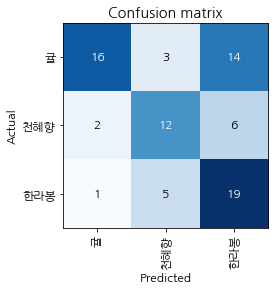

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
len(dls.valid.items)

78

In [ ]:
len(dls.train.items)

316

In [ ]:
interp.plot_top_losses(15, nrows=2)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
cleaner.delete()

In [ ]:
for idx in cleaner.delete() : 
  cleaner.fns[idx].unlink()

In [ ]:
cleaner.change()

In [ ]:
for idx, cat in cleaner.change() : 
  shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('/images/천혜향.jpg') # 귤이라고 생각할만 함...;;;

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()

In [ ]:
out_pl.clear_output()
with out_pl : display(img.to_thumb(128,128))
out_pl

In [ ]:
pred, pred_idx, probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}, Probability : {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description = 'Classify')
btn_run

In [ ]:
!pip install voila --upgrade

In [ ]:
!jupyter serverextension enable voila --sys-prefix